# 0. - Sommaire
---
---

- **1\.** Récupérer & charger les données
  - **1.1.** Récupérer le jeu de données
  - **1.2.** Charger les données dans le Notebook
  

- **2\.** Nettoyer & consolider

  - **2.1.** Analyse rapide du fichier
  
  - **2.2.** Suppression des données trop incomplètes
  
  - **2.3.** Suppression / Modification / Merge des données
    - **2.3.1.** Suppression des colonnes toujours uniques / identiques (ou quasi)
    - **2.3.1.** Suppression des colonnes correspondantes à une autre (lien 1-1)
    - **2.2.3.** Suppression / Merge des données trop peu representées
    - **2.3.4.** Suppression / Modification des données anormales
    
  - **2.4.** Compléter les données manquantes
    - **2.4.1.** Complétion de la colonne ESPECE
    - **2.4.2.** Complétion de la colonne STADE DE DEVELOPPEMENT
    
  - **2.5.** Revérification suite à la complétion des données 

# 1. - Récupérer & charger les données
---
---

## 1.1. - Récupérer le jeu de données
---

[Lien officiel de la Mairie de Paris pour exporter le jeu de données - les arbres](https://opendata.paris.fr/explore/dataset/les-arbres/export/)

## 1.2. - Charger les données dans le Notebook
---

In [1]:
# import des librairies utiles à l'analyse
import numpy as np
import pandas as pd
import seaborn as sns

# lecture du fichier les-arbres.csv pour le charger en tant que DataFrame
data = pd.read_csv('les-arbres.csv', sep=';')
data_save = data

# affichage des 5 premières lignes du fichier
data.head(5)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,148074,Arbre,CIMETIERE,PARIS 16E ARRDT,NaN,NaN,CIMETIERE DE PASSY / AVENUE CHAUVET / DIV 8,A01400008001,Marronnier,Aesculus,hippocastanum,NaN,219,15,M,NON,"48.8627890216,2.28544758344"
1,151493,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DE L''AULNAIE / ...,A03200092002,Aulne,Alnus,cordata,NaN,0,0,NaN,NaN,"48.8038461392,2.30521618838"
2,164116,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DE LA PEUPLERAIE...,A02900002001,Peuplier,Populus,nigra,''Italica'',0,0,NaN,NaN,"48.8094182564,2.31652958922"
3,268463,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD VOLTAIRE,003301022,Platane,Platanus,x hispanica,NaN,115,20,A,NON,"48.8536851325,2.38720363168"
4,204618,Arbre,Alignement,PARIS 12E ARRDT,32,NaN,RUE CHALIGNY,000402017,Marronnier,Aesculus,x carnea,NaN,25,5,J,NON,"48.8484916698,2.38413340284"


# 2. - Nettoyer & consolider
---
---

## 2.1. - Analyse rapide du fichier
---

In [2]:
# nombre de lignes
print(">>> nombre de lignes :", len(data))

# nombre de colonnes
print(">>> nombre de colonnes :", len(data.columns))

>>> nombre de lignes : 205319
>>> nombre de colonnes : 17


## 2.2. - Suppression des données trop incomplètes
---

In [3]:
# complétude de chaque colonne
print(">>> complétude de chaque colonne : ( nombre de lignes totale :", len(data),")")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].count()/len(data)*100,2), "% )",
          "- (",
          data[column].count(),
          ")"
         )

>>> complétude de chaque colonne : ( nombre de lignes totale : 205319 )

IDBASE : ( 100.0 % ) - ( 205319 )
TYPE EMPLACEMENT : ( 100.0 % ) - ( 205319 )
DOMANIALITE : ( 100.0 % ) - ( 205319 )
ARRONDISSEMENT : ( 100.0 % ) - ( 205319 )
COMPLEMENT ADRESSE : ( 18.06 % ) - ( 37074 )
NUMERO : ( 0.0 % ) - ( 0 )
LIEU / ADRESSE : ( 100.0 % ) - ( 205319 )
IDEMPLACEMENT : ( 100.0 % ) - ( 205319 )
LIBELLE FRANCAIS : ( 99.65 % ) - ( 204591 )
GENRE : ( 100.0 % ) - ( 205318 )
ESPECE : ( 98.98 % ) - ( 203231 )
VARIETE OUCULTIVAR : ( 18.57 % ) - ( 38128 )
CIRCONFERENCE (cm) : ( 100.0 % ) - ( 205319 )
HAUTEUR (m) : ( 100.0 % ) - ( 205319 )
STADE DE DEVELOPPEMENT : ( 72.1 % ) - ( 148035 )
REMARQUABLE : ( 81.61 % ) - ( 167562 )
geo_point_2d : ( 100.0 % ) - ( 205319 )


* Les colonnes suivantes peuvent être supprimées :
  * **COMPLEMENT ADRESSE** n'est complète qu'à **18%**
  * **NUMERO** est toujours **vide**
  * **VARIETE OUCULTIVAR** n'est complète qu'à **19%**


* À noter que certaines colonnes ne sont que partiellement incomplètes :
  * **ESPECE** est complète à **99%**
  * **STADE DE DEVELOPPEMENT** est complète à **72%**
  * **REMARQUABLE** est complète à **82%**
* Une analyse plus poussée est à faire sur ces colonnes (voir plus bas)

In [4]:
# suppression des colonnes trop incomplètes
try:
    data = data.drop(columns=['COMPLEMENT ADRESSE', 'NUMERO', 'VARIETE OUCULTIVAR'])
    print(">>> suppression des colonnes trop incomplètes")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 14)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes trop incomplètes
>>> nombre de colonnes restantes : 14


## 2.3. - Suppression / Modification / Merge des données
---

**Une colonne peut être jugée inutile si :**
* l'ensemble de ses valeurs sont toujours uniques (hors coordonnées GPS)
  - suppression de la donnée
  
  
* l'ensemble de ses valeurs sont toujours identiques ou quasiment identiques
  * suppression de la donnée
  
  
* l'ensemble de ses valeurs, bien que différentes, correspondent valeur par valeur à une autre colonne (lien 1-1)
  * suppression d'une des données

**Une donnée peut être jugée inutile si :**
* elle est trop peu représentée pour avoir un réel impact sur l'analyse
  * ex : la domanialité DASES ne concerne que 11 lignes du fichier
  * suppression ou merge de la donnée
  
  
* par rapport à l'ensemble des données du même type, sa valeur est radicalement différente sans raison apparente
  * ex : une hauteur de 10 000 mètres pour un arbre n'est pas crédible
  * suppression ou modification de la donnée

> ### 2.3.1. - Suppression des colonnes toujours uniques / identiques (ou quasi)

In [5]:
# unicité de chaque colonne
print(">>> unicité de chaque colonne :")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].value_counts().count()/len(data)*100,2), "% )", 
          "- (", 
          data[column].value_counts().count(),
          ")"
         )

>>> unicité de chaque colonne :

IDBASE : ( 100.0 % ) - ( 205318 )
TYPE EMPLACEMENT : ( 0.0 % ) - ( 1 )
DOMANIALITE : ( 0.0 % ) - ( 9 )
ARRONDISSEMENT : ( 0.01 % ) - ( 25 )
LIEU / ADRESSE : ( 3.48 % ) - ( 7147 )
IDEMPLACEMENT : ( 34.3 % ) - ( 70426 )
LIBELLE FRANCAIS : ( 0.09 % ) - ( 192 )
GENRE : ( 0.09 % ) - ( 175 )
ESPECE : ( 0.26 % ) - ( 540 )
CIRCONFERENCE (cm) : ( 0.25 % ) - ( 510 )
HAUTEUR (m) : ( 0.07 % ) - ( 147 )
STADE DE DEVELOPPEMENT : ( 0.0 % ) - ( 4 )
REMARQUABLE : ( 0.0 % ) - ( 2 )
geo_point_2d : ( 100.0 % ) - ( 205310 )


* Les colonnes suivantes peuvent être supprimées :
  * **IDBASE** est unique à **100%** puisque c'est un ID
  * **TYPE EMPLACEMENT** contient une **unique valeur ( 1 )** (Arbre)
  


* À noter que la colonne **geo_point_2d** ne contient que des valeurs uniques mais reste pertinente pour l'analyse des données


* À noter qu'une analyse plus poussée est nécessaire pour les colonnes suivantes :
  * **IDEMPLACEMENT** n'est **pas toujours unique** malgré que ce soit à priori un ID
  * **STADE DE DEVELOPPEMENT** ne contient que **4 valeurs distinctes**
  * **REMARQUABLE** ne contient que **2 valeurs distinctes**

In [6]:
# suppression des colonnes "uniques"
try:
    data = data.drop(columns=['IDBASE', 'TYPE EMPLACEMENT'])
    print(">>> suppression des colonnes 'uniques'")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 12)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes 'uniques'
>>> nombre de colonnes restantes : 12


>> #### 2.3.1.1. - Analyse plus poussée - IDEMPLACEMENT

In [7]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['IDEMPLACEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )

# unicité de la colonne
print(">>> unicité de la colonne : (",
      round(data['IDEMPLACEMENT'].value_counts().count()/len(data)*100,2), "% )", 
      "- (", 
      data['IDEMPLACEMENT'].value_counts().count(),
      ")"
     )
print()


#zoom 1:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,1,0.1))
print(">>> zoom 1 : aucun identifiant n'est en doublon + de", int(round(0.1*len(data),0)), "fois (10%)")
print(idcut.value_counts().sort_index())
print()

#zoom 2:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.1,0.01))
print(">>> zoom 2 : aucun identifiant n'est en doublon + de", int(round(0.01*len(data),0)), "fois (1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 3: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.01,0.001))
print(">>> zoom 3  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 4: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0.001,0.009,0.0005))
print(">>> zoom 4  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.01%)")
print(idcut.value_counts().sort_index())
print()

>>> complétude de la colonne : ( 100.0 % ) - ( 205319 )
>>> unicité de la colonne : ( 34.3 % ) - ( 70426 )

>>> zoom 1 : aucun identifiant n'est en doublon + de 20532 fois (10%)
(0.0, 0.1]    70426
(0.1, 0.2]        0
(0.2, 0.3]        0
(0.3, 0.4]        0
(0.4, 0.5]        0
(0.5, 0.6]        0
(0.6, 0.7]        0
(0.7, 0.8]        0
(0.8, 0.9]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 2 : aucun identifiant n'est en doublon + de 2053 fois (1%)
(0.0, 0.01]     70426
(0.01, 0.02]        0
(0.02, 0.03]        0
(0.03, 0.04]        0
(0.04, 0.05]        0
(0.05, 0.06]        0
(0.06, 0.07]        0
(0.07, 0.08]        0
(0.08, 0.09]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 3  : la plupart des identifiants sont en doublons + de 205 fois (0.1%)
(0.0, 0.001]      70320
(0.001, 0.002]       72
(0.002, 0.003]       16
(0.003, 0.004]        7
(0.004, 0.005]        4
(0.005, 0.006]        4
(0.006, 0.007]        1
(0.007, 0.008]        2
(0.008, 0.009]        0
Name: IDEM

**/!\ Quid de cette information ? /!\**
* doit-on la supprimer car c'est un identifiant ? on estime dès lors que les doublons sont des anomalies
* doit-on essayer de l'exploiter et la relier à d'autres valeurs ?

>> #### 2.3.1.2. - Analyse plus poussée - STADE DE DEVELOPPEMENT

In [8]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['STADE DE DEVELOPPEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['STADE DE DEVELOPPEMENT'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 72.1 % ) - ( 205319 )

>>> répartition des valeurs :
A : ( 34.85 % ) - ( 71560 )
JA : ( 18.28 % ) - ( 37527 )
J : ( 15.51 % ) - ( 31836 )
M : ( 3.46 % ) - ( 7112 )


* Bilan de l'analyse de la colonne **STADE DE DEVELOPPEMENT** :
  * elle est complète à **72%**
  * ces données sont suffisamment réparties entre les différentes catégories
 
**/!\ Pour être exploitée, cette colonne doit être complétée /!\**
 
* Comment compléter intelligemment les données manquantes ?
  * peut-on déduire un lien entre **STADE DE DEVELOPPEMENT** et d'autres colonnes ?
    * ex : GENRE / ESPECE ?
    * ex : CIRCONFERENCE / HAUTEUR ?

>> #### 2.3.1.3. - Analyse plus poussée - REMARQUABLE

In [9]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['REMARQUABLE'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['REMARQUABLE'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 81.61 % ) - ( 205319 )

>>> répartition des valeurs :
NON : ( 81.52 % ) - ( 167380 )
OUI : ( 0.09 % ) - ( 182 )


* Bilan de l'analyse de la colonne **REMARQUABLE** :
  * elle est complète à **82%**
  * la quasi totalité des données est répartie dans une seule catégorie (NON)
 
**/!\ Cette colonne peut être supprimée /!\**

In [10]:
# suppression des de la colonne REMARQUABLE
try:
    data = data.drop(columns=['REMARQUABLE'])
    print(">>> suppression de la colonne REMARQUABLE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 11)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne REMARQUABLE
>>> nombre de colonnes restantes : 11


> ### 2.3.2. - Suppression des colonnes correspondantes à une autre (lien 1-1)

In [11]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7147 )
IDEMPLACEMENT : ( 70426 )
LIBELLE FRANCAIS : ( 192 )
GENRE : ( 175 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 510 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205310 )



* les colonnes les plus suceptibles de se correspondre ont un nombre d'index et des données similaires
* les seules assez proches dans ce cas sont **LIBELLE FRANCAIS** & **GENRE**

In [16]:
# liste des LIBELLE FRANCAIS ayant plus de 1 genre

try:
    sub_data = data[['LIBELLE FRANCAIS', 'GENRE']]
    serie = sub_data.groupby('LIBELLE FRANCAIS').GENRE.nunique() > 1

    for index in serie.index:
        if serie[index]:
            print(">>>", index)
            #print(">>>", data_save.loc[data_save['LIBELLE FRANCAIS'] == index, 'GENRE'].unique())
            print(data_save.loc[data_save['LIBELLE FRANCAIS'] == index, 'GENRE'].value_counts())
            print()
except KeyError:
    print("La colonne GENRE a déjà été supprimée")

La colonne GENRE a déjà été supprimée


Analyse des LIBELLE FRANCAIS:
* Chimonanthe:
  * Il y a une simple confusion entre l'ESPECE (Chionanthus) et le le GENRE (Chimonanthus)
* Chêne:
  * 1 seule différence qui semble être une erreur (Sapindus)
* Cyprès:
  * les deux catégories font référence à des Cyprès bien qu'il y ait de légères différences
* ...

dans l'ensemble la colonne **GENRE** n'apporte que très peu de valeur ajoutée par rapport à **LIBELLE FRANCAIS**
* Soit il s'agit d'erreurs 
* Soit il n'y a qu'une seule différence qui est négligeable
* Soit la différence concrète entre les genres est trop subtile pour être exploitée

**/!\ Nous pouvons supprimer la colonne GENRE /!\**

In [13]:
# suppression des de la colonne GENRE
try:
    data = data.drop(columns=['GENRE'])
    print(">>> suppression de la colonne GENRE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 11)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne GENRE
>>> nombre de colonnes restantes : 10


> ### 2.3.3. - Suppression / Merge des données trop peu representées

In [14]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

# répartition des valeurs par colonne ayant peu d'index distincts (< 50)
print(">>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :")
print()

for column in data.columns:
    if len(data[column].value_counts()) < 50:
        serie = data[column].value_counts()
        serie2 = data[column].value_counts()/len(data)*100
        serie_f = serie.to_frame()
        serie_f['%'] = serie2
        print(serie_f)
        print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7147 )
IDEMPLACEMENT : ( 70426 )
LIBELLE FRANCAIS : ( 192 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 510 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205310 )

>>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :

              DOMANIALITE          %
Alignement         106412  51.827644
Jardin              48671  23.705064
CIMETIERE           32201  15.683400
DASCO                7126   3.470697
PERIPHERIQUE         5399   2.629567
DJS                  4072   1.983255
DFPE                 1406   0.684788
DAC                    21   0.010228
DASES                  11   0.005358

                   ARRONDISSEMENT         %
PARIS 15E ARRDT             17369  8.459519
PARIS 16E ARRDT             17076  8.316814
PARIS 13E ARRDT             17058  8.308047
PARIS 20E ARRDT             15554  7.575529
PARIS 19E ARRDT             14443  7.0

**DOMANIALITE**
* **On remarque que:**
  * les index DAC / DASES / DFPE sont très faiblement représentés (< %1)
  * les index DASCO / PERIPHERIQUE / DJS sont faiblement représentés (< 5%)
    * total = 8%
  * les trois autres index sont représentés comme suit :
    * Alignement : 52%
    * Jardin : 24%
    * CIMETIERE :16%
    * total = 92% 
* **Que faire des données ?**
  * Doit-on supprimer les lignes trop peu représentées ?
    * À partir de quel % est-ce acceptable de supprimer ? < à 1% cela semble OK
    * Par contre, 3% de 200k lignes = 6k lignes
  * Ou doit-on merger les groupes trop faiblement représentés entre-eux ? 
    * pour DAC / DASES / DFPE / DASCO / DJS on pourrait dire que cela a potentiellement du sens car ce sont des acronymes...
    * Est-ce que cela a du sens pour PERIPHERIQUE ?
    
>

**ARRONDISSEMENT**
* **On remarque que:** 
  * l'ensemble des index sont plutôt bien répartis
  * mais certaines valeurs sont très faibles par rapport à d'autres
* **Que faire des données ?** : 
  * on les laisse telles quelles ?
  * on merge des arrondissement proches entre eux ?
  * [arrondissement de Paris](https://lh3.googleusercontent.com/proxy/QhI2ql8p8ZGKatVZJN_nDz4x0oPXkvlkVQuoa68onT3Ql6w_RJqDA5-gyzYxc_TTeEbeUNfayJrhwxQexcnoSJ5bQMT9TXbX0qbEApoUaWjgz61r0taWEck7l_1Zhmyz--7jygblsgvBJ5FOoNAR6XT-)
    * ex: 1er + 2eme + 3eme + 4eme
    * ex : 6eme + 7eme
    * ex : 8eme + 9eme
    * ex : Val de Marne + Bois de Vincenne ?
    * ex : Hauts de Seine + Bois de Boulogne

>

**STADE DE DEVELOPPEMENT**
* **On remarque que:** l'ensemble des index sont plutôt bien répartis
* **Que faire des données ?** : on les laisse telles quelles

> ### 2.3.4. - Suppression / Modification des données anormales

Les colonnes les plus suceptibles d'abriter des donnnées anormales sont :
* CIRCONFERENCE (cm)
* HAUTEUR (m)
    

#### Analyse plus poussée - CIRCONFERENCE (cm)

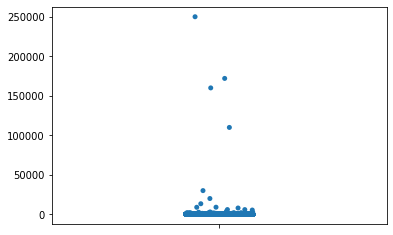

In [72]:
sns.stripplot(x=data[['CIRCONFERENCE (cm)']], orient='v')

* Quelques lignes semblent avoir des circonférences abherrantes
* Nous pouvons les supprimer pour y voir plus clair

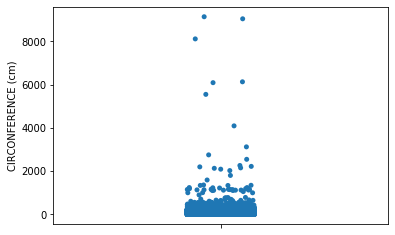

In [80]:
clean_data = data[~(data['CIRCONFERENCE (cm)'] > 10000)]
sns.stripplot(x=clean_data['CIRCONFERENCE (cm)'], orient='v')

#### Analyse plus poussée - HAUTEUR (m)

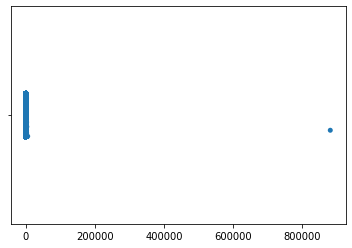

In [71]:
sns.stripplot(x=data[['HAUTEUR (m)']], orient='v')

## 2.4. - Compléter les données manquantes
---

> ### 2.4.1. - Complétion de la colonne ESPECE

> ### 2.4.2. - Complétion de la colonne STADE DE DEVELOPPEMENT

## 2.5. - Revérification suite à la complétion des données 
---

# 3. - Analyser & exploiter
---
---